In [2]:
import time
import os
import re
import sys
import numpy as np
#import cupy as cp
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.signal import hilbert, chirp
from plotly.offline import plot
import plotly.express as px     
#from Utils2 import *
from Utils99 import *
from Utils_graph import *
import pickle as pkl
import re
#from dsp99 import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
#from scipy.stats import norm, kurtosis
from scipy.signal import stft
from scipy import signal
#from sktime.libs.vmdpy import VMD
from vmdpyR2 import * 
from collections import Counter
from scipy.stats import kurtosis
from scipy.signal import butter, filtfilt
from vmdpyR2 import * 
import nbformat
window = 1024
fs = 25600

'''
Rotação: 2100, BPFO (Outer Race): 107.91 Hz
Rotação: 2100, BPFI (Inner Race): 172.09 Hz
Rotação: 2100, BSF (Ball Spin): 72.33 Hz
Rotação: 2100, FTF (Cage Frequency): 13.49 Hz

Rotação: 2250, BPFO (Outer Race): 115.62 Hz
Rotação: 2250, BPFI (Inner Race): 184.38 Hz
Rotação: 2250, BSF (Ball Spin): 77.50 Hz
Rotação: 2250, FTF (Cage Frequency): 14.45 Hz

Rotação: 2400, BPFO (Outer Race): 123.32 Hz
Rotação: 2400, BPFI (Inner Race): 196.68 Hz
Rotação: 2400, BSF (Ball Spin): 82.66 Hz
Rotação: 2400, FTF (Cage Frequency): 15.42 Hz
'''

'\nRotação: 2100, BPFO (Outer Race): 107.91 Hz\nRotação: 2100, BPFI (Inner Race): 172.09 Hz\nRotação: 2100, BSF (Ball Spin): 72.33 Hz\nRotação: 2100, FTF (Cage Frequency): 13.49 Hz\n\nRotação: 2250, BPFO (Outer Race): 115.62 Hz\nRotação: 2250, BPFI (Inner Race): 184.38 Hz\nRotação: 2250, BSF (Ball Spin): 77.50 Hz\nRotação: 2250, FTF (Cage Frequency): 14.45 Hz\n\nRotação: 2400, BPFO (Outer Race): 123.32 Hz\nRotação: 2400, BPFI (Inner Race): 196.68 Hz\nRotação: 2400, BSF (Ball Spin): 82.66 Hz\nRotação: 2400, FTF (Cage Frequency): 15.42 Hz\n'

In [ ]:
path = '03_VMDY/'
brngs = os.listdir(path)
k = 10
for brng in brngs:
    if brng.startswith('Bearing3_5'):
        samples = os.listdir(path+brng)
        samples.sort(key=lambda x: int(re.search(r'\d+', x).group()))
        for sample in samples:
            print(path+brng+'/'+sample)
            df = pd.read_csv(path+brng+'/'+sample)
            sig1 = df['Vertical_vibration_signals'].values

            modes, _, _ = VMD(sig1, alpha=2000, tau=0, K=k, DC=0, init=1, tol=1e-6)
            names = [f'IMF{i+1}' for i in range(len(modes))]
            modes=np.concatenate(([sig1],modes),axis=0)
            names = ['SIG'] + names
            
            df = pd.DataFrame(modes).T
            df.columns = names
            df.to_csv(path+brng+'/'+sample, index = False)


In [ ]:
path = '03_VMDY/'
brngs = os.listdir(path)
k = 10
for brng in brngs:
    
    samples = os.listdir(path+brng)
    samples.sort(key=lambda x: int(re.search(r'\d+', x).group()))
    for sample in samples:
        print(path+brng+'/'+sample)
        df = pd.read_csv(path+brng+'/'+sample)
        sig1 = df['Vertical_vibration_signals'].values

        modes, _, _ = VMD(sig1, alpha=2000, tau=0, K=k, DC=0, init=1, tol=1e-6)
        names = [f'IMF{i+1}' for i in range(len(modes))]
        modes=np.concatenate(([sig1],modes),axis=0)
        names = ['SIG'] + names
        
        df = pd.DataFrame(modes).T
        df.columns = names
        df.to_csv(path+brng+'/'+sample, index = False)

In [ ]:
path = r'03_VMDY/'
out = r'03_VMDY_FFT/'
brngs = os.listdir(path)
for brng in brngs:
    
    samples = os.listdir(path+brng)
    samples.sort(key=lambda x: int(re.search(r'\d+', x).group()))
    print(brng)
    for sample in samples:
        #print(path+brng+'/'+sample)
        df = pd.read_csv(path+brng+'/'+sample)
        df = df_env(df,fs)
        df.to_csv(out+brng+'/'+sample, index = False)

In [ ]:
path = r'03_VMDY/'
out = r'03_VMDY_FFT/'
brngs = os.listdir(path)
num_splits = 100
for brng in brngs:
    
    samples = os.listdir(path+brng)
    samples.sort(key=lambda x: int(re.search(r'\d+', x).group()))
    print(brng)
    for sample in samples:
        #print(path+brng+'/'+sample)
        df = pd.read_csv(path+brng+'/'+sample)
        vec = df['IMF1'].values
        total_len = len(vec)
        block_size = total_len // num_splits
        all_ffts = []
        freq_axis = None

        for i in range(num_splits):
            start = i * block_size
            end = start + block_size
            print(i, start,end)
            # Recorte do sinal
            segment = vec[start:end]
            
            # Calcula FFT do Envelope usando a função fornecida
            freqs, amps = envelope(segment, fs)
            
            # Armazena a amplitude
            all_ffts.append(amps)
            
            # Guarda o eixo de frequência da primeira iteração (é igual para todos)
            if freq_axis is None:
                freq_axis = freqs

        # Criar DataFrame
        # Linhas = Blocos de tempo (0 a 99)
        # Colunas = Frequências
        
        # Formatamos os nomes das colunas para serem as frequências (ex: "10.5Hz")
        col_names = [f"{f:.2f}" for f in freq_axis]
        
        df = pd.DataFrame(data=all_ffts, columns=col_names)

        break
    break

In [72]:
import numpy as np
import pandas as pd
from scipy.signal import hilbert

def envelope(signal, rate):
    """
    Função original fornecida (levemente ajustada para robustez).
    Calcula o espectro do envelope de Hilbert.
    """
    # 1. Transformada de Hilbert e Envelope de Amplitude
    # Nota: hilbert() retorna o sinal analítico (complexo)
    analytic_signal = hilbert(signal)
    amplitude_envelope = np.abs(analytic_signal)
    
    # 2. Remover componente DC (Média)
    amplitude_envelope = amplitude_envelope - np.mean(amplitude_envelope)
    
    # 3. FFT do Envelope
    n = len(amplitude_envelope)
    f_env = np.fft.fft(amplitude_envelope)
    
    # Normalização da Amplitude (2/N)
    fft_hilbert = 2.0 * np.abs(f_env) / n
    
    # Vetor de Frequências
    freq_hilbert = np.fft.fftfreq(n, 1/rate)
    
    # 4. Shift (opcional se filtrarmos manualmente, mas mantendo a lógica original)
    fft_hilbert = np.fft.fftshift(fft_hilbert)
    freq_hilbert = np.fft.fftshift(freq_hilbert)
    
    # 5. Filtrar apenas frequências positivas
    mask = (freq_hilbert >= 0) & (freq_hilbert <= rate/2)
    
    return freq_hilbert[mask], fft_hilbert[mask]

def process_envelope_splits(vec, fs, num_splits=100):
    """
    Divide o sinal em num_splits partes e retorna um DataFrame 
    com as FFTs do envelope.
    """
    total_len = len(vec)
    block_size = total_len // num_splits
    
    if block_size < 10:
        raise ValueError("O sinal é muito curto para ser dividido nessas partes.")

    # Listas para armazenar resultados
    all_ffts = []
    col_names=['FREQ']
    freq_axis = None
    
    # Loop sequencial (rápido o suficiente com numpy/scipy puro)
    for i in range(num_splits):
        start = i * block_size
        end = start + block_size
        
        # Recorte do sinal
        segment = vec[start:end]
        
        # Calcula FFT do Envelope usando a função fornecida
        freqs, amps = envelope(segment, fs)
        
        # Armazena a amplitude
        if i == 0:
            all_ffts.append(freqs)
            all_ffts.append(amps)
        else:
            all_ffts.append(amps)
        # Guarda o eixo de frequência da primeira iteração (é igual para todos)
        
        col_names.append(f'P{i+1}')

    # Criar DataFrame
    # Linhas = Blocos de tempo (0 a 99)
    # Colunas = Frequências
    
    # Formatamos os nomes das colunas para serem as frequências (ex: "10.5Hz")
    #col_names = [f"P{i}" for i in range(num_splits)]
    
    df = pd.DataFrame(data=all_ffts)
    df = df.T
    df.columns = col_names
    
    return df

path =r'03_VMDY\Bearing1_1\112.csv'
df = pd.read_csv(path)
sig = df['IMF1'].values
df_env = process_envelope_splits(sig, fs, num_splits=50)

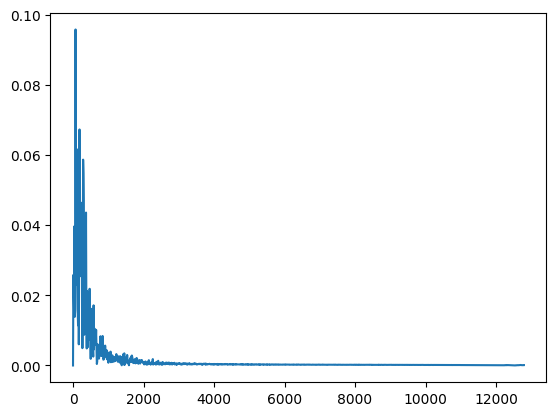

In [ ]:
sig = df['IMF1'].values
freq,fft = envelope(sig[2500:5000],rate=25600)
plt.plot(freq,fft)

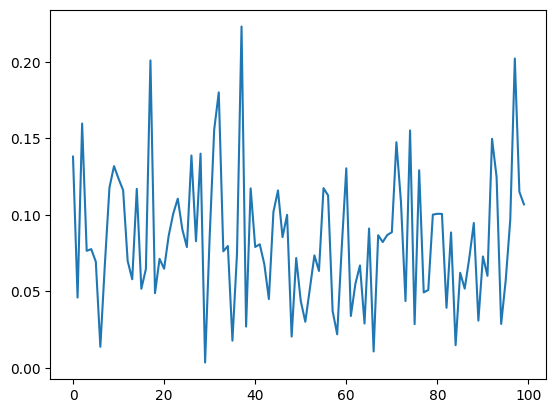

In [29]:
plt.plot(df.iloc[:,1])